In [45]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

from drama.drama_tools import grid_run_drama, outliers_real, all_metrics
from drama.utils import MCC, rws_score
from sklearn.metrics import roc_auc_score
from keras.datasets import mnist

%matplotlib inline

In [8]:
from drama.splitters import Splitter
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA,TruncatedSVD,NMF,FastICA

In [3]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [35]:
inlier_labels = [3,4,6,8]
outlier_labels = [5,0]
n_inliers = 3000
n_outliers = 10

X = []
y = []
for i in inlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_inliers])
    y.extend(n_inliers*[0])
    
for i in outlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_outliers])
    y.extend(n_outliers*[1])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size, image_size, 1])

In [36]:
X = np.reshape(x_train, [-1, image_size, image_size, 1])
y = y_train

In [37]:
X = []
y = []
labels = [1,2]
for i in labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt])
    y.extend(ns*[i])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size, image_size, 1])

In [38]:
X.shape,y.shape

((12700, 28, 28, 1), (12700,))

In [39]:
n_data = X.shape[0]
X = X.reshape(n_data,-1)
X.shape

(12700, 784)

In [40]:
agg = AgglomerativeClustering(n_clusters=2)
clustering = agg.fit_predict

In [41]:
splitter = Splitter(X,
                    reducer = PCA(n_components=2),
                    clustering = clustering,
                    data_dim = 1,
                    z_dim=2)


In [42]:
splitter.split(2,verbose=1,training_epochs=20)

Split level: 1
--------------------------
Split level:  2


In [43]:
pred = outliers_real(X,splitter,all_metrics)

In [48]:
o1 = pred['L2']

auc = roc_auc_score(y==1, o1)
mcc = MCC(y==1, o1)
rws = rws_score(y==1, o1)
print(auc,mcc,rws)

0.017134626455195267 -0.8593692881715567 0.21314477855079658


In [58]:
import umap
import umap.plot

In [ ]:
class

    def __init__(self):
    self.umap = umap.UMAP(random_state=42)

    def fit(seld,x):
        self.umap.fit(x)

    def transform(self,x):
        return self.umap.transform(x)

    def inverse_transform(self,x):
        return self.umap.inverse_transform(x)



In [ ]:
mapper = umap.UMAP(random_state=42).fit(data)
# inv_transformed_points = mapper.inverse_transform(test_pts)

In [91]:
nmapper = umap.UMAP(n_components=2,random_state=42)
agg = AgglomerativeClustering(n_clusters=4)
clustering = agg.fit_predict

In [93]:
splitter = Splitter(X,
                    reducer = nmapper,
                    clustering = clustering,
                    data_dim = 1,
                    z_dim=2)


In [94]:
splitter.split(1,verbose=1,training_epochs=20)

Split level: 1


/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/gf/packages/anaconda3/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array

In [95]:
pred = outliers_real(X,splitter,all_metrics)

In [96]:
o1 = pred['L2']

auc = roc_auc_score(y==1, o1)
mcc = MCC(y==1, o1)
rws = rws_score(y==1, o1)
print(auc,mcc,rws)

0.009987692946840682 -0.8615824466509311 0.22345838458754352


In [98]:
c = splitter.labels[0]
c.shape,np.unique(c)

((12700,), array([0., 1., 2., 3.]))

In [100]:
points = splitter.z_mu[0]

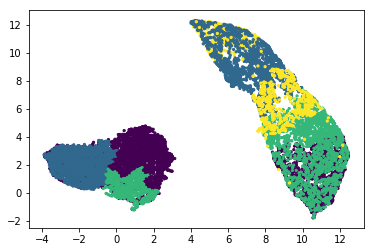

In [101]:
plt.scatter(points[:, 0], points[:, 1], s= 5, c=c)

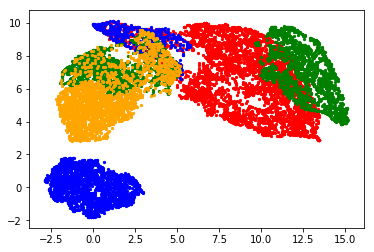

In [85]:
clrs = ['r','b','g','orange']

for i in range(2):    
    for j in range(2):
        inds = splitter.lbls[i]==j
        points = splitter.z_mu[i][inds]
        plt.scatter(points[:, 0], points[:, 1], s= 5, c=clrs[2*i+j])